In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

song_attributes = pd.read_csv("songs_with_attributes_and_lyrics.csv")
playback = pd.read_csv("spotify_history.csv")

In [6]:
song_attributes.columns = song_attributes.columns.str.strip()
song_attributes = song_attributes.drop('lyrics', axis=1)
print(song_attributes.head(10))

                       id                           name  \
0  0Prct5TDjAnEgIqbxcldY9                              !   
1  2ASl4wirkeYm3OWZxXKYuq                             !!   
2  69lcggVPmOr9cvPx9kLiiN                !!! - Interlude   
3  4U7dlZjg1s9pjdppqZy0fm                 !!De Repente!!   
4  4v1IBp3Y3rpkWmWzIlkYju                 !!De Repente!!   
5  5tA3ImW310llKo8EMBj2Ga            !!Noble Stabbings!!   
6  0fROT4kK5oTm8xO8PX6EJF                 !I'll Be Back!   
7  1xBFhv5faebv3mmwxx7DnS                         !Lost!   
8  0gNNToCW3qjabgTyBSjt3H      !Que Vida! - Mono Version   
9  6LrefSCg9Vnn1ckCeJkmbA  !Viva el Mal Viva el Capital!   

                               album_name         artists  danceability  \
0                              UNDEN!ABLE    ['HELLYEAH']         0.415   
1                                     NaN         Yxngxr1         0.788   
2                       Where I Belong EP      ['Glowie']         0.000   
3  Un Palo Al Agua (20 Grandes Cancione

In [8]:
print(playback[playback['skipped']==True].head(10))

          spotify_track_uri                   ts platform  ms_played  \
96   2oq2dbjW3sxOY0BscMWd7Q  2013-07-10 08:28:05  windows      50952   
97   1WETgXqmJ2NaziQhtav0pK  2013-07-10 08:30:32  windows     147536   
99   7qUA9MGpAGuIAAuXn0l7ik  2013-07-10 08:49:19  windows       4643   
100  6U93aW72iDtXBnzmb30r3i  2013-07-11 00:25:47  windows      96173   
101  4rHZZAmHpZrA3iH5zx8frV  2013-07-11 05:12:52  windows     360354   
102  4rHZZAmHpZrA3iH5zx8frV  2013-07-12 01:04:39  windows       1011   
103  0EUSbTvyZfo9QOcxunL9Ro  2013-07-13 03:47:11  windows       1012   
110  1KQ6mxVLMaJDtf36A1XRMd  2013-07-13 20:57:19  windows       1020   
111  4rHZZAmHpZrA3iH5zx8frV  2013-07-13 21:00:43  windows     205051   
112  2GAljG6WxV0XU7N88TWhb1  2013-07-13 21:04:58  windows     255388   

                                            track_name        artist_name  \
96                                     I'll Be Alright        Passion Pit   
97                                        Moth's Wing

In [11]:
category_counts = playback['ms_played'].value_counts()
category_counts

ms_played
0         3733
23        2413
1532       165
246000     139
243666     137
          ... 
78943        1
130215       1
44783        1
56176        1
145478       1
Name: count, Length: 43082, dtype: int64

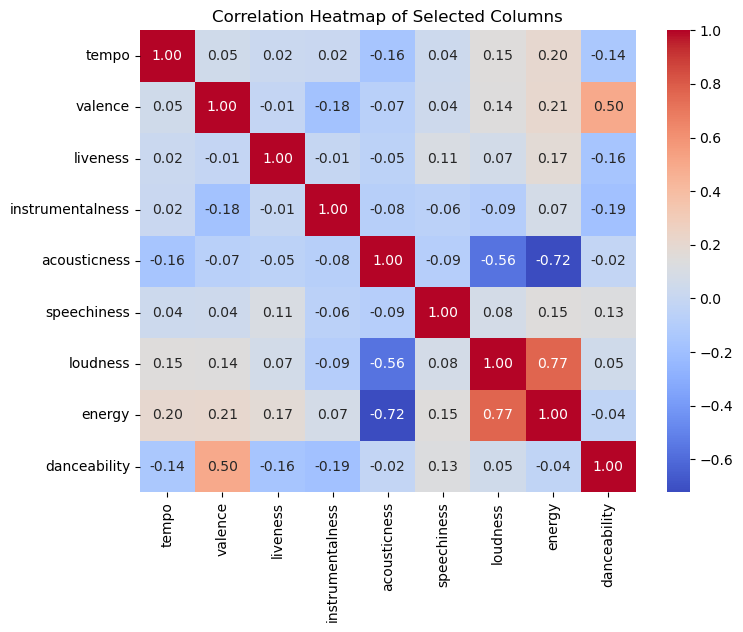

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
corr_columns = ['tempo', 'valence', 'liveness', 'instrumentalness', 'acousticness', 'speechiness', 'loudness', 'energy', 'danceability']
corr = song_attributes[corr_columns]

# Calculate the correlation matrix
correlation_matrix = corr.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [16]:
# Step 1: Convert to datetime
playback['ts'] = pd.to_datetime(playback['ts'])

# Step 2: Extract hour
playback['hour'] = playback['ts'].dt.hour

# Step 3: Define 3-hour bins
bins = list(range(0, 25, 3))  # [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = [
    '12AM–3AM', '3AM–6AM', '6AM–9AM', '9AM–12PM',
    '12PM–3PM', '3PM–6PM', '6PM–9PM', '9PM–12AM'
]

# Step 4: Assign time window
playback['time_window'] = pd.cut(playback['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Optional: drop the helper column
playback.drop(columns='hour', inplace=True)

print(playback[['ts', 'time_window']].sample(10))


                        ts time_window
55679  2019-07-17 11:23:37    9AM–12PM
88041  2020-12-11 16:15:44     3PM–6PM
118365 2022-05-05 02:07:33    12AM–3AM
70790  2020-04-19 21:40:14    9PM–12AM
121249 2022-07-02 10:03:15    9AM–12PM
53146  2019-04-09 03:25:25     3AM–6AM
97699  2021-04-21 02:07:38    12AM–3AM
78697  2020-09-05 21:19:53    9PM–12AM
61526  2019-10-20 18:34:21     6PM–9PM
14822  2017-04-12 09:15:18    9AM–12PM
